# Schrodinger Solver

In [4]:
%matplotlib notebook
import sys
ver=sys.version_info.major
if ver==2:
    from utils2 import *
elif ver==3:
    from utils3 import *
else:
    print("Python version not recognized. Python 2.5 or greater required.")
import numpy as np

## Note about units
We will be using atomic units throughout.

In [5]:
# atomic units
hbar=1.0
m=1.0
#set precision of numerical approximation
steps=2000

## Kronig Penney Model

<IPython.core.display.Javascript object>


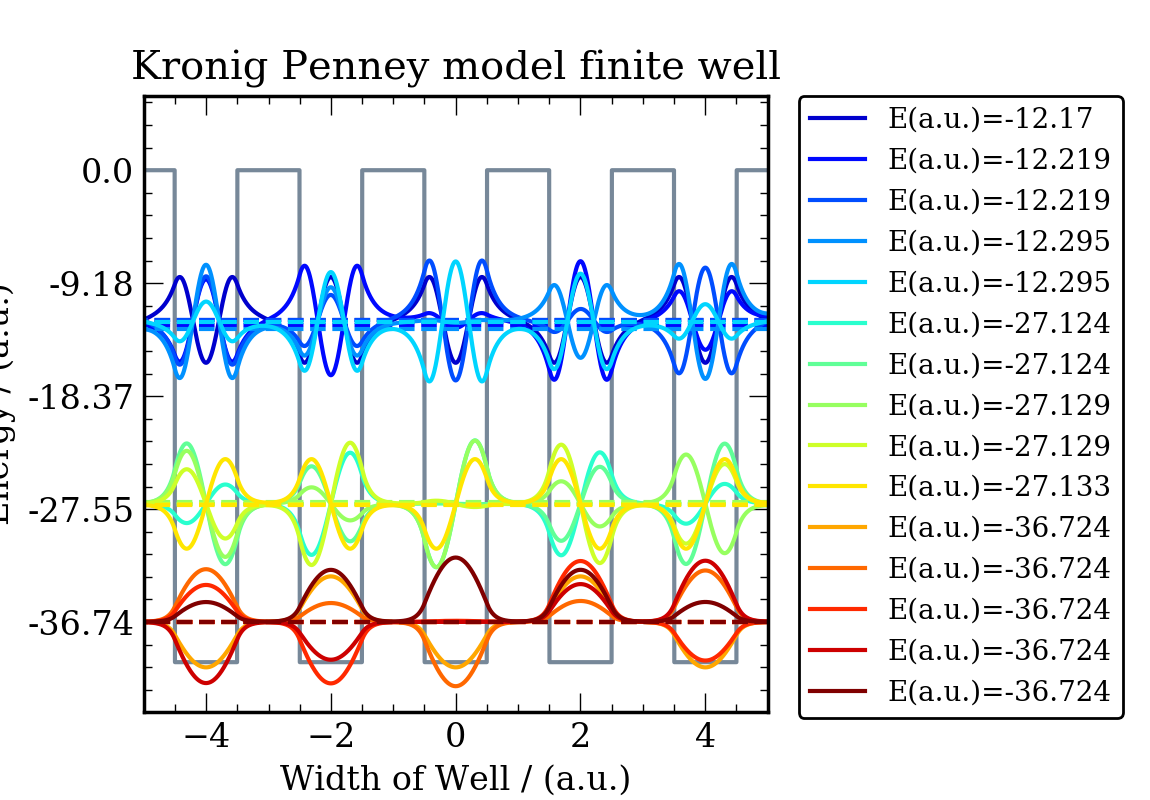


*******************************************************************************
                           Schrodinger Solver Output
                        Matthew Srnec and Shiv Upadhyay
*******************************************************************************
                        Kronig Penney model finite well

		Input:
                            Well Width (a.u.) : 1.0
                           Well Depth (a.u.) : -40.0

		15 lowest Bound States:
                              E(0)=-36.7243669232
                              E(1)=-36.724366923
                              E(2)=-36.7238860908
                              E(3)=-36.7238860908
                              E(4)=-36.7235888436
                              E(5)=-27.1325440431
                              E(6)=-27.1293005015
                              E(7)=-27.1293005015
                              E(8)=-27.1240445908
                              E(9)=-27.1240445908
                             E(10

In [6]:
########
# PARTICLE IN A MORSE WELL OF DEPTH (D) WITH A FORCE CONSTANT (omega)
########
Case=7
########
# INPUT
########
# get well depth and width
A = 1.0 # This value should be between 1 and 15
D = 40.0 # This value should be between 20 and 500
B = 1.0 # This value should be between 1 and 15
num_wells = 5
########
# CODE
########
# divide by two so a well from -W to W is of input width
W=A/2.0
# create x-vector from -W to W
x_size = (A * (num_wells // 2.0)) + (B * (num_wells //2.0)) + W + B/2.0
xvec=np.linspace(-x_size,x_size,steps)
# get step size
h=xvec[1]-xvec[0]
# create the potential from step function
U = (step_func(xvec + W)-step_func(xvec-W))
for n in range(1,((num_wells//2)+1)):
    U += (step_func(xvec + W + (n*B) + ((n)*A)) - step_func(xvec + W + (n*B) + ((n-1)*A)))
    U += (step_func(xvec - W - (n*B) - ((n-1)*A)) - step_func(xvec - W - (n*B) - ((n)*A)))
U *= -D
# create Laplacian via 3-point finite-difference method
Laplacian=(-2.0*np.diag(np.ones(steps))+np.diag(np.ones(steps-1),1)\
    +np.diag(np.ones(steps-1),-1))/(float)(h**2)
Laplacian[0,len(Laplacian)-1] = -1/(float)(h**2)
Laplacian[len(Laplacian)-1,0] = -1/(float)(h**2)
# create the Hamiltonian
Hamiltonian=np.zeros((steps,steps))
[i,j]=np.indices(Hamiltonian.shape)
Hamiltonian[i==j]=U
Hamiltonian+=(-0.5)*((hbar**2)/m)*Laplacian
# diagonalize the Hamiltonian yielding the wavefunctions and energies
E,V=diagonalize_hamiltonian(Hamiltonian)
# determine number of energy levels to plot (n)
n=0
while E[n]<0:
    n+=1
# create plot
Kronig_Penney_Plot(E,V,xvec,steps,n,Case,U)
# print output
output(Case,['Well Width (a.u.)','Well Depth (a.u.)'],[W*2,-D],E,n)